
# OCD Patient Dataset: Demographics & Clinical Data Analysis

## Project Objective

My goal in this project is to perform an in-depth Exploratory Data Analysis (EDA) on a dataset of Obsessive-Compulsive Disorder (OCD) patients. I will then use this analysis to build and evaluate machine learning models, specifically to predict the `Medications` prescribed based on demographic and clinical factors. My focus is on understanding the relationships between these factors and treatment outcomes.


## Dataset Overview

The dataset contains information for 1500 individuals diagnosed with OCD, including a wide range of parameters:

*   **Patient ID:** Unique identifier for each patient.
*   **Age:** Age of the patient.
*   **Gender:** Gender of the patient.
*   **Ethnicity:** Ethnicity of the patient.
*   **Marital Status:** Marital status of the patient.
*   **Education Level:** Level of education attained by the patient.
*   **OCD Diagnosis Date:** Date when OCD was diagnosed.
*   **Duration of Symptoms (months):** Duration for which the patient has been experiencing symptoms.
*   **Previous Diagnoses:** Any previous diagnoses before OCD.
*   **Family History of OCD:** Whether the patient has a family history of OCD.
*   **Obsession Type:** Type of obsessions experienced by the patient.
*   **Compulsion Type:** Type of compulsions experienced by the patient.
*   **Y-BOCS Score (Obsessions):** Y-BOCS score related to obsessions.
*   **Y-BOCS Score (Compulsions):** Y-BOCS score related to compulsions.
*   **Depression Diagnosis:** Whether the patient has been diagnosed with depression.
*   **Anxiety Diagnosis:** Whether the patient has been diagnosed with anxiety.
*   **Medications:** Medications the patient is currently taking.

**Key Steps in My Process:**

1.  **Data Loading and Initial Exploration:** Load the dataset and inspect its basic structure, identify missing values.
2.  **Descriptive Statistics & Visualizations:** Generate summary statistics and create visualizations to understand data distributions and relationships.
3.  **Preprocessing:** Clean and transform the raw data into a suitable format for machine learning models.
4.  **Correlation Analysis:** Examine correlations between numerical features to find relationships.
5.  **Feature Selection & Scaling:** Identify important features and prepare them for modeling by scaling.
6.  **Model Training & Evaluation:** Build and train various classification models, including an ensemble, and evaluate their predictive performance.
7.  **Key Insights & Reporting:** Summarize my findings and discuss their implications for understanding OCD.




---

## 1. Importing Libraries & Dataset Loading



Libraries must be installed:

pip install pandas numpy seaborn matplotlib scikit-learn missingno xgboost catboost lightgbm

Note: Specific environment issues may require careful version pinning for these libraries,
especially due to the NumPy 2.x transition (e.g., NumPy<2).


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

import xgboost as xgb
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone



# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
print("Libraries imported successfully (eli5 excluded for compatibility).")




file_path = 'OCD Patient Dataset Demographics & Clinical Data.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from '{file_path}'. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: Dataset not found at '{file_path}'. Please ensure the file name and path are correct.")
    exit() # Stop execution if data isn't found



Libraries imported successfully (eli5 excluded for compatibility).
Dataset loaded successfully from 'OCD Patient Dataset Demographics & Clinical Data.csv'. Shape: (1500, 17)



---

## 2. Initial Data Exploration

I perform an initial examination of the dataset to understand its basic structure, identify data types, and check for any immediate signs of missing values.




--- Initial Data Exploration ---

Displaying the first 5 rows of the dataset:
   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion

<Figure size 1000x600 with 0 Axes>

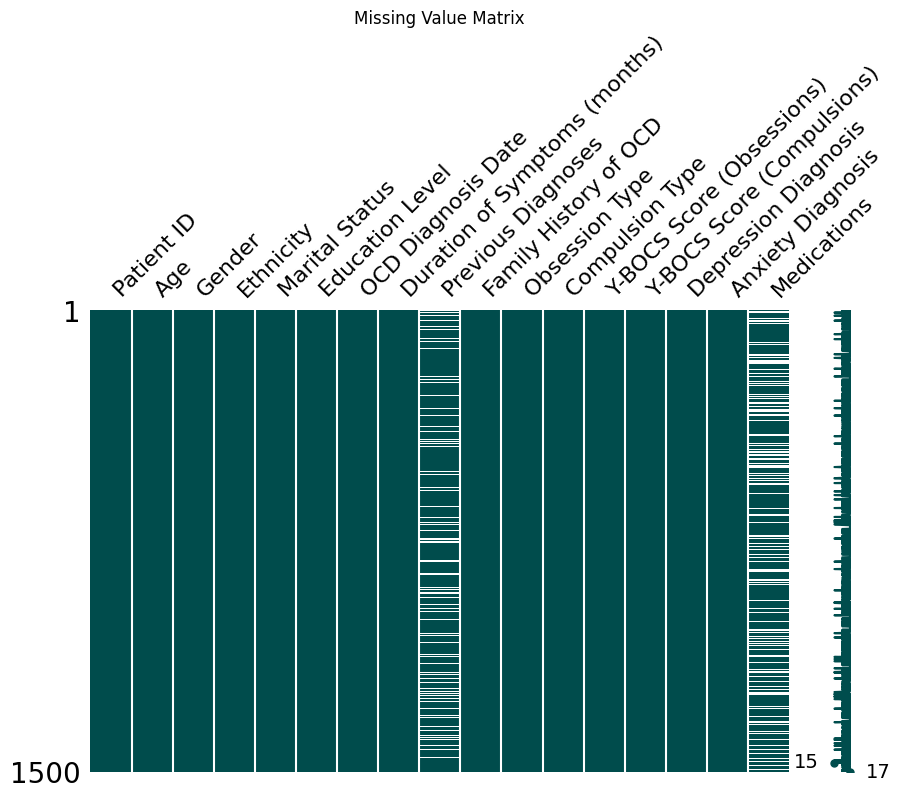

In [2]:


print("\n--- Initial Data Exploration ---")

print("\nDisplaying the first 5 rows of the dataset:")
print(df.head()) # Showing the first few records to get a quick overview

print("\n--- Dataset Information (df.info()) ---")
df.info() # Provides a concise summary including Dtypes and Non-Null counts

print("\n--- Missing Values Count (df.isnull().sum()) ---")
print(df.isnull().sum()) # Quantifies missing values per column

print("\n--- Visualizing Missing Values (msno.matrix) ---")
if not df.empty:
    plt.figure(figsize=(10, 6))
    msno.matrix(df, figsize=(10,6), color=(0.0,0.3,0.3)) # Visualizing nullity matrix
    plt.title('Missing Value Matrix')
    plt.show()
else:
    print("DataFrame is empty, cannot visualize missing values.")




*Initial Observations:*
- The dataset contains 1500 entries.
- Columns like `Previous Diagnoses` and `Medications` have a significant number of missing values (248 and 386 respectively).
- Several columns are of `object` dtype, which means they contain categorical strings that will need numerical encoding for machine learning.
- `OCD Diagnosis Date` is also an object, and based on inspection, it is a date string that I'll decide to drop later, as its direct date value is not being used numerically for modeling.

---



## 3. Descriptive Statistics & Initial Preprocessing

I calculate descriptive statistics to understand the central tendency and spread of numerical features and the frequency of categorical features. As an initial crucial preprocessing step, I'm filling the missing values in my target variable, `Medications`, with 'Unknown' to ensure it's fully populated before further encoding.



In [3]:


print("\n--- Descriptive Statistics & Initial Preprocessing ---")

print("\n--- Summary Statistics for Numerical Columns (df.describe()) ---")
print(df.describe()) # Provides statistics for numerical columns

print("\n--- Summary Statistics for Categorical Columns (df.describe(include='object')) ---")
print(df.describe(include='object')) # Provides counts, unique values, top occurring item for object columns

print("\n--- Preprocessing: Handling Missing 'Medications' values ---")
if not df.empty and 'Medications' in df.columns:
    df.loc[:, 'Medications'] = df['Medications'].fillna('Unknown') # Filling NaNs in target variable
    print("Missing 'Medications' values filled with 'Unknown'.")
    print("\nRe-checking missing values after filling 'Medications':")
    print(df.isnull().sum()) # Confirming fill
else:
    print("DataFrame is empty or 'Medications' column not found, skipping handling missing 'Medications'.")




--- Descriptive Statistics & Initial Preprocessing ---

--- Summary Statistics for Numerical Columns (df.describe()) ---
        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.00000


*Observation:* My `Medications` column no longer has any missing values after filling with 'Unknown'.

---



## 4. Visualizing Demographic & Clinical Data

I create a series of visualizations to explore the distributions of key demographic factors and clinical parameters. This helps me uncover patterns and insights.




--- Visualizing Demographic & Clinical Data ---


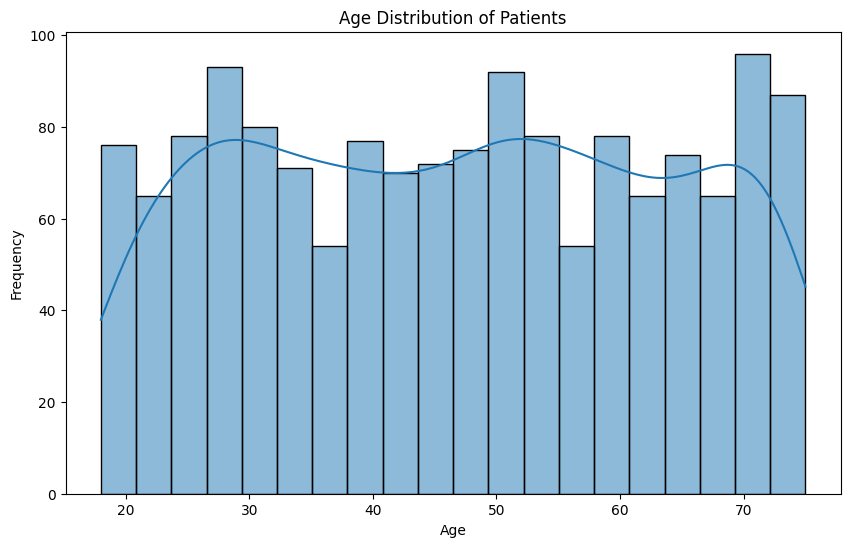

In [4]:


print("\n--- Visualizing Demographic & Clinical Data ---")

# Age distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


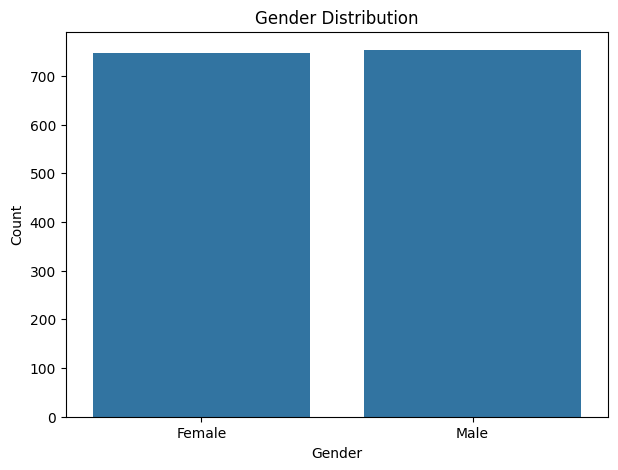

In [5]:

# Gender distribution countplot
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


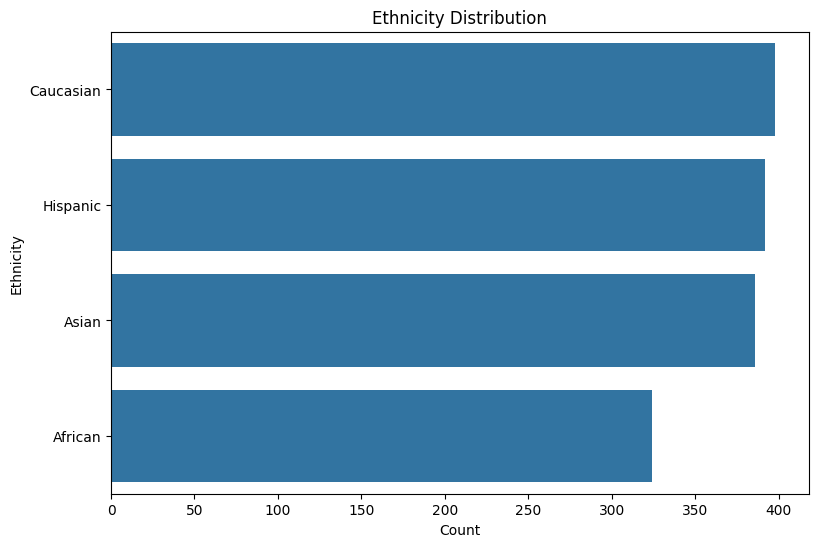

In [6]:

# Ethnicity distribution countplot (horizontal for better readability if many categories)
plt.figure(figsize=(9, 6))
sns.countplot(y='Ethnicity', data=df, order=df['Ethnicity'].value_counts().index)
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()


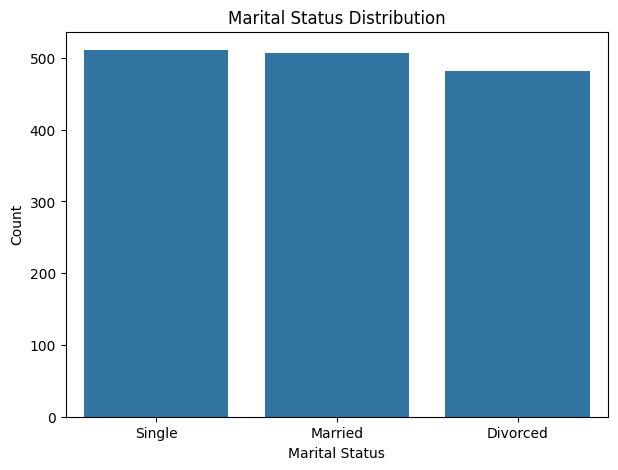

In [7]:

# Marital Status distribution countplot
plt.figure(figsize=(7, 5))
sns.countplot(x='Marital Status', data=df, order=df['Marital Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


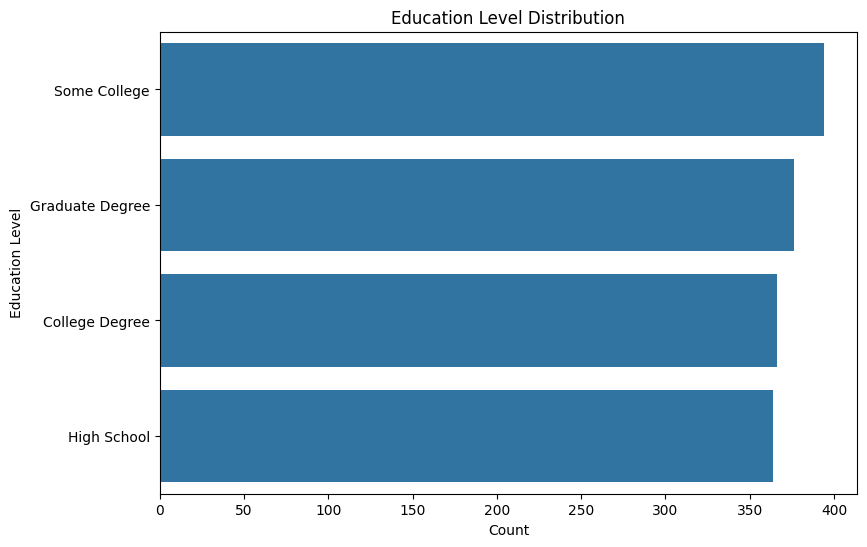

In [8]:

# Education Level distribution countplot
plt.figure(figsize=(9, 6))
sns.countplot(y='Education Level', data=df, order=df['Education Level'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


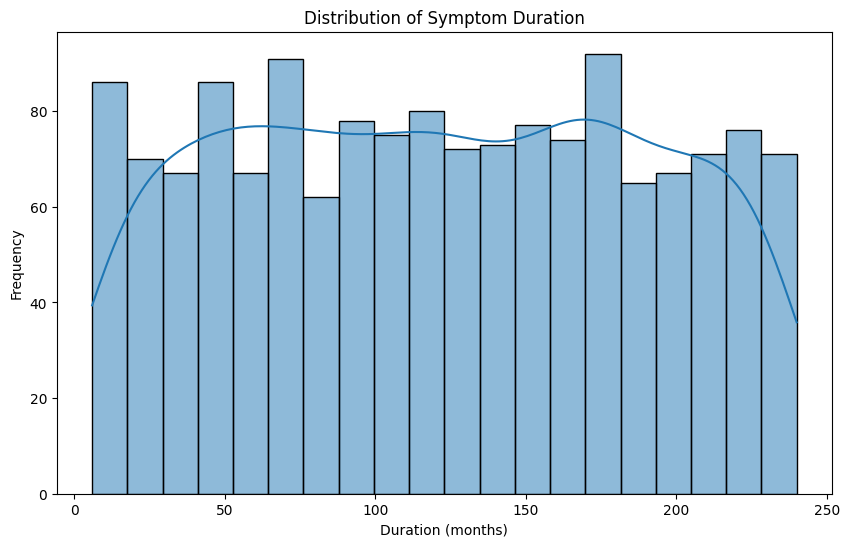

In [9]:

# Distribution of symptom duration histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration of Symptoms (months)'], bins=20, kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()


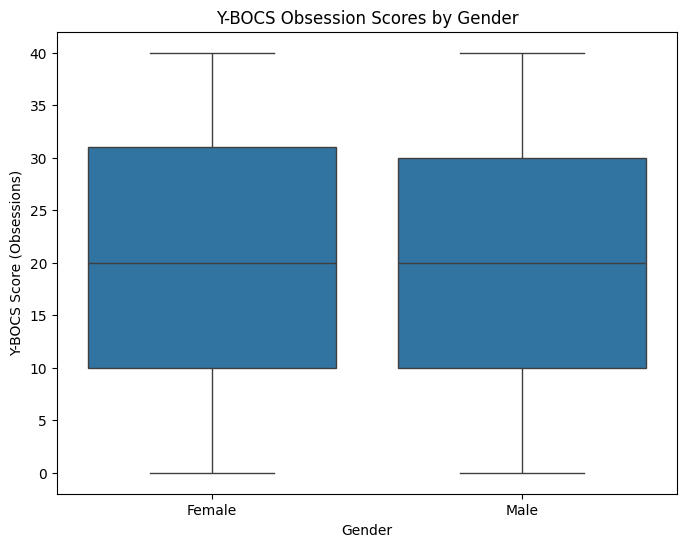

In [10]:

# Boxplot of Y-BOCS Scores by Gender (Obsessions) to compare scores across genders
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.show()


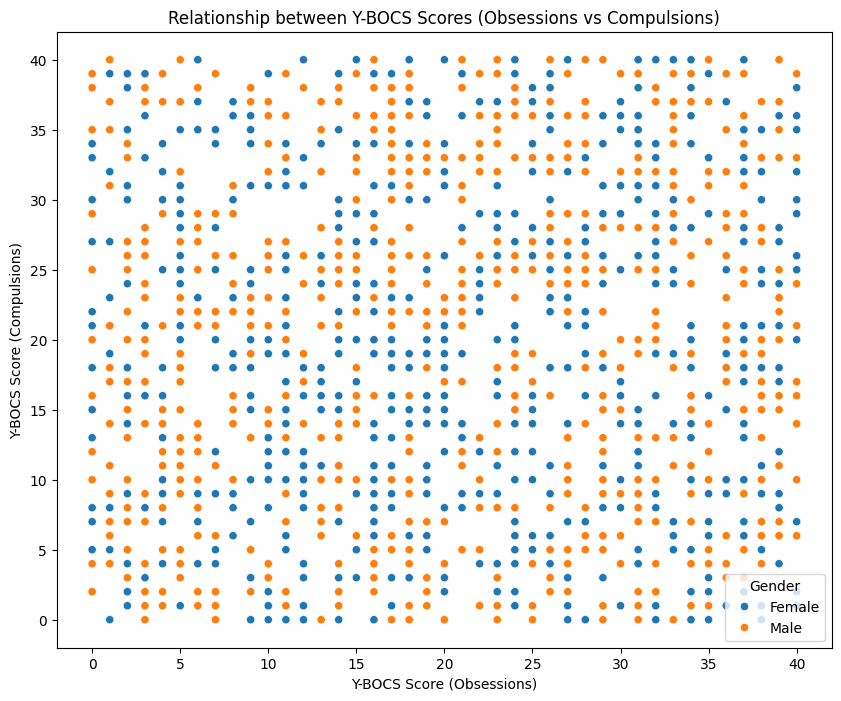

In [11]:

# Scatter plot of Obsession vs Compulsion Y-BOCS Scores, colored by Gender
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Gender', data=df)
plt.title('Relationship between Y-BOCS Scores (Obsessions vs Compulsions)')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()


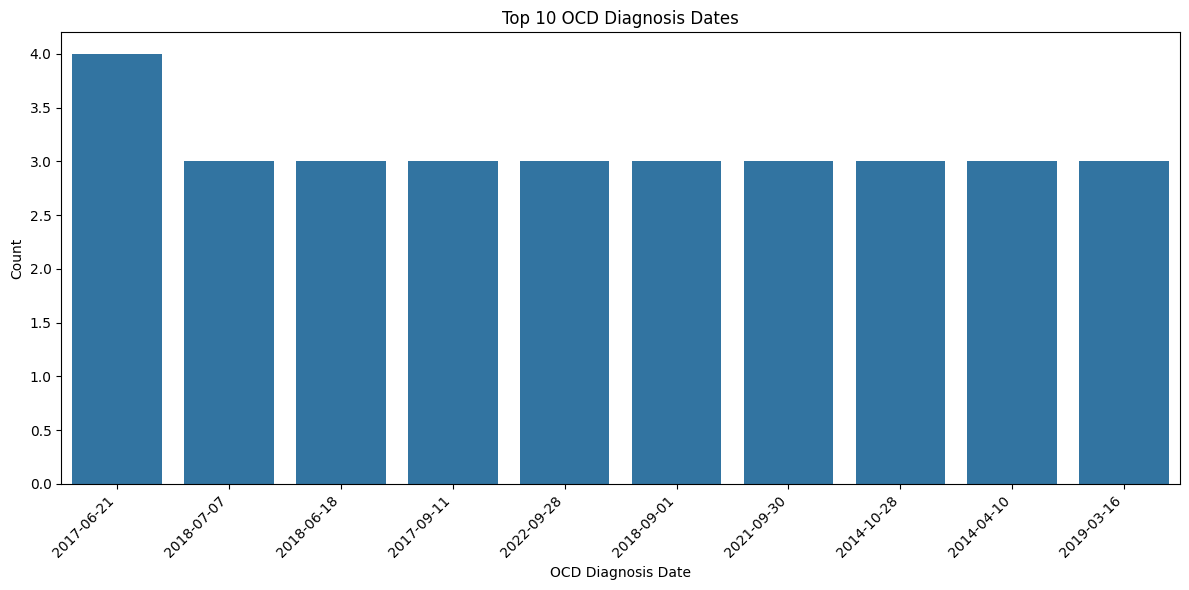

In [12]:

# OCD Diagnosis Date countplot (showing top 10 as dates are often numerous)
plt.figure(figsize=(12, 6))
sns.countplot(x='OCD Diagnosis Date', data=df, order=df['OCD Diagnosis Date'].value_counts().head(10).index)
plt.title('Top 10 OCD Diagnosis Dates')
plt.xlabel('OCD Diagnosis Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


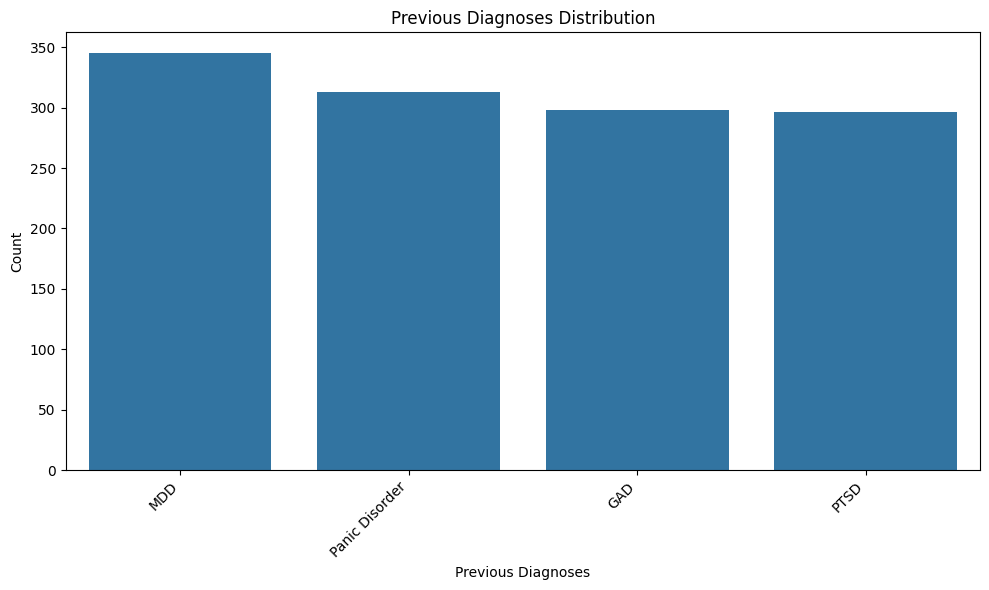

In [13]:

# Previous Diagnoses distribution countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Previous Diagnoses', data=df, order=df['Previous Diagnoses'].value_counts().index)
plt.title('Previous Diagnoses Distribution')
plt.xlabel('Previous Diagnoses')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


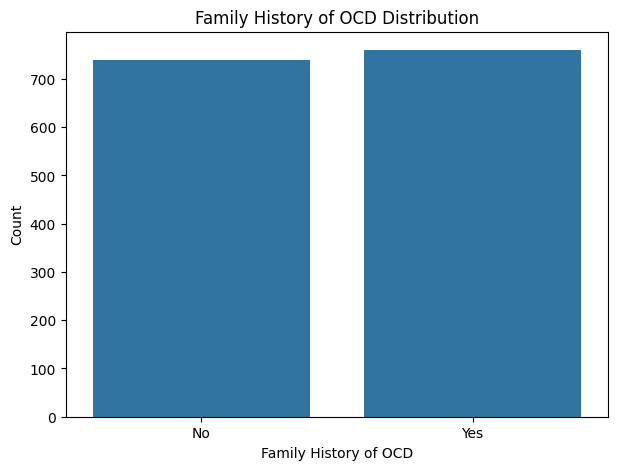

In [14]:

# Family History of OCD distribution countplot
plt.figure(figsize=(7, 5))
sns.countplot(x='Family History of OCD', data=df)
plt.title('Family History of OCD Distribution')
plt.xlabel('Family History of OCD')
plt.ylabel('Count')
plt.show()


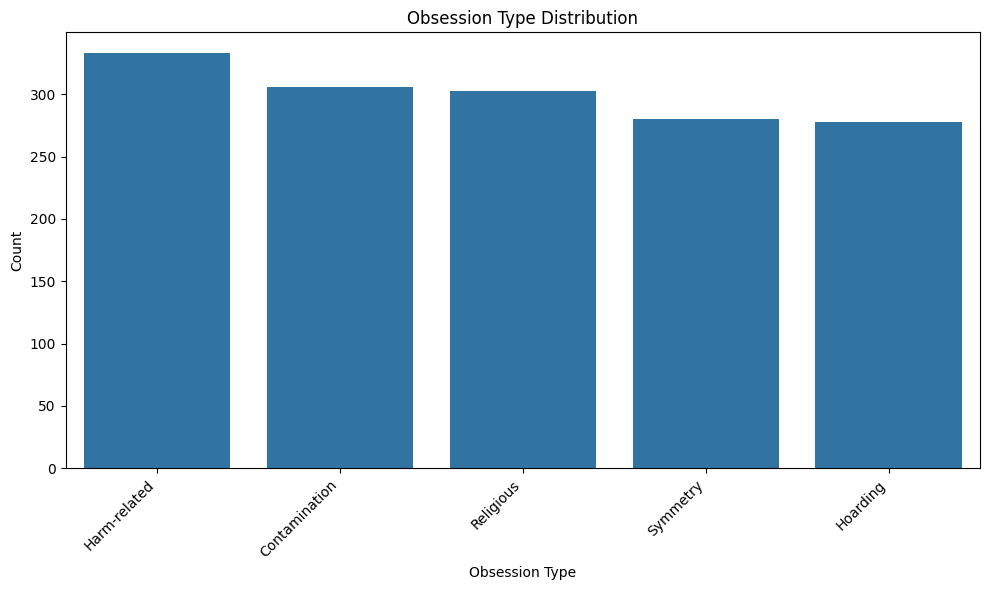

In [15]:

# Obsession Type distribution countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Obsession Type', data=df, order=df['Obsession Type'].value_counts().index)
plt.title('Obsession Type Distribution')
plt.xlabel('Obsession Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


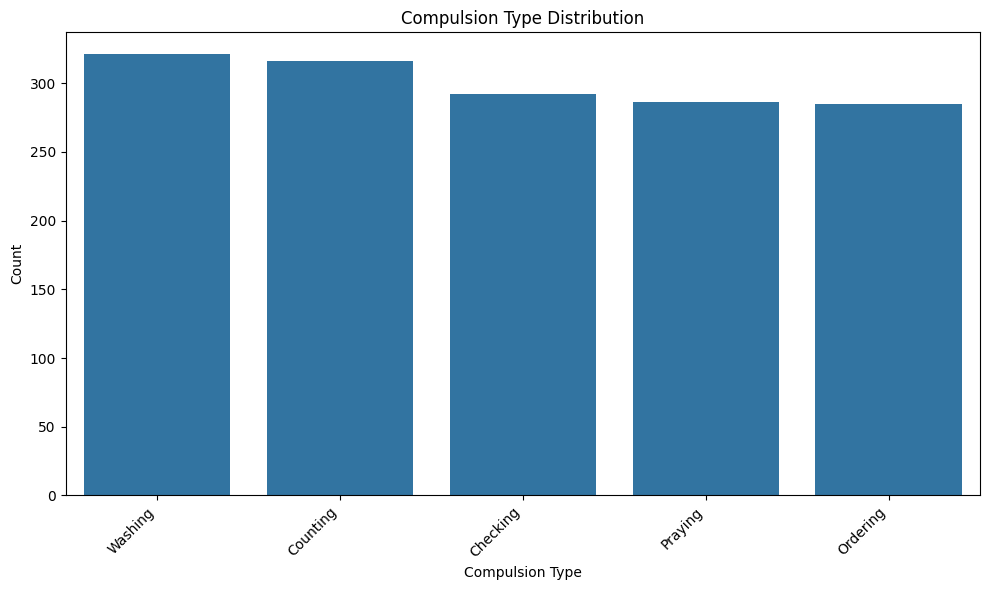

In [16]:

# Compulsion Type distribution countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Compulsion Type', data=df, order=df['Compulsion Type'].value_counts().index)
plt.title('Compulsion Type Distribution')
plt.xlabel('Compulsion Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


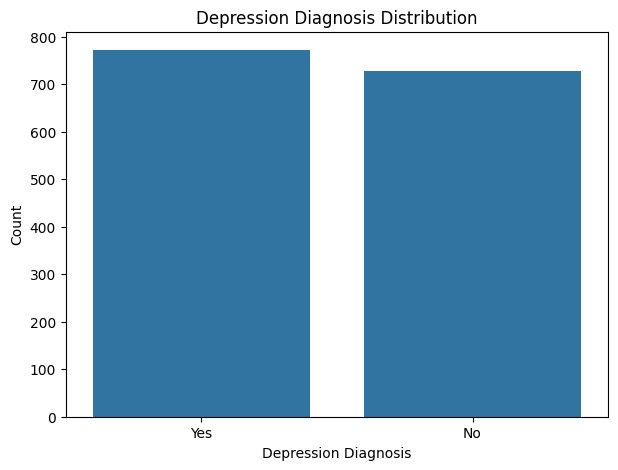

In [17]:

# Depression Diagnosis distribution countplot
plt.figure(figsize=(7, 5))
sns.countplot(x='Depression Diagnosis', data=df)
plt.title('Depression Diagnosis Distribution')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Count')
plt.show()


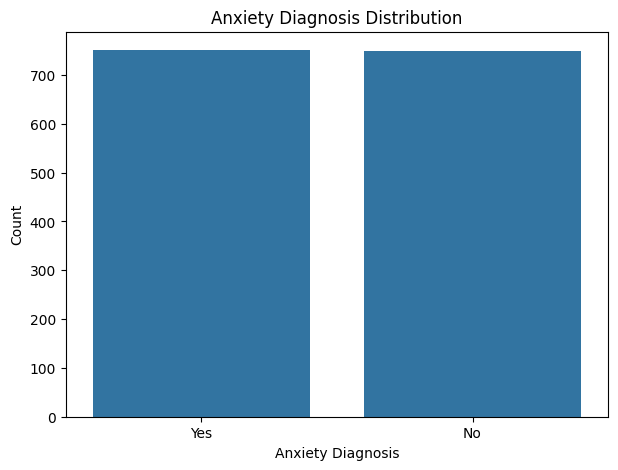

In [18]:

# Anxiety Diagnosis distribution countplot
plt.figure(figsize=(7, 5))
sns.countplot(x='Anxiety Diagnosis', data=df)
plt.title('Anxiety Diagnosis Distribution')
plt.xlabel('Anxiety Diagnosis')
plt.ylabel('Count')
plt.show()


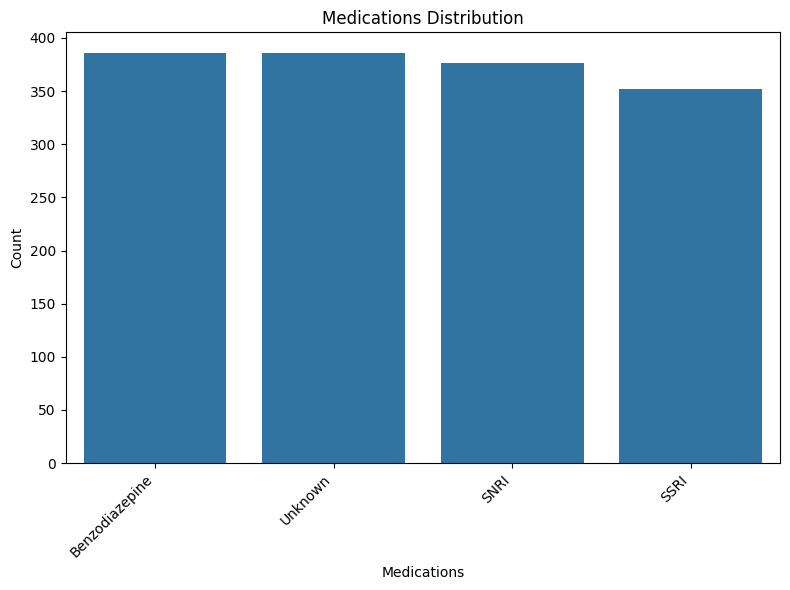

In [19]:

# Medications distribution countplot (after NaNs handled)
plt.figure(figsize=(8, 6))
sns.countplot(x='Medications', data=df, order=df['Medications'].value_counts().index)
plt.title('Medications Distribution')
plt.xlabel('Medications')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---

## 5. Preprocessing & Correlation Analysis

In this phase, I prepare the dataset for machine learning. This involves converting categorical string data into numerical formats (label encoding), handling the remaining missing values, and then calculating correlations between all numerical features.




--- Preprocessing & Correlation Analysis ---
Initial dtypes of my `train_df` copy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 n

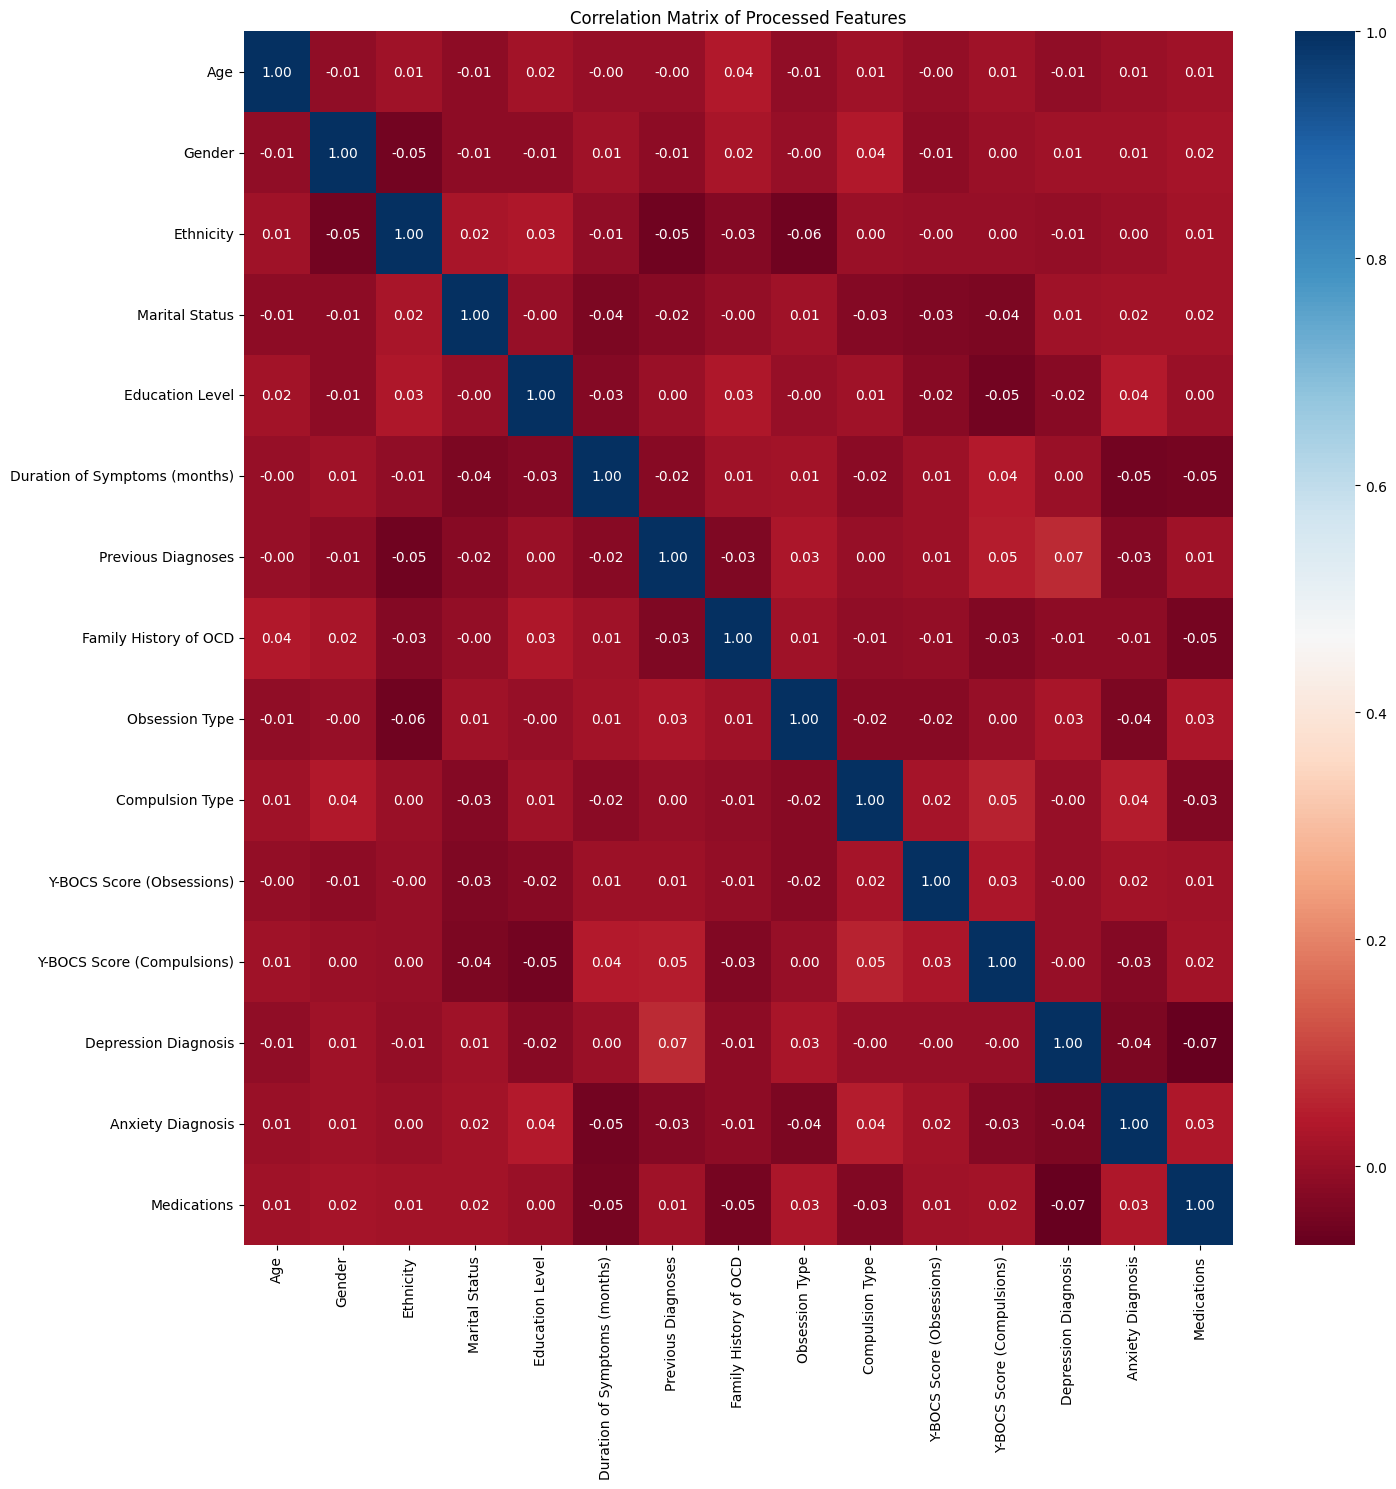


--- Preprocessing and Correlation Analysis Complete ---


In [20]:


print("\n--- Preprocessing & Correlation Analysis ---")

train_df = df.copy() # Working on a fresh copy of the DataFrame for preprocessing

print("Initial dtypes of my `train_df` copy:")
train_df.info()

# Dropping 'OCD Diagnosis Date' as it's not used as a numerical feature and complex to process.
if 'OCD Diagnosis Date' in train_df.columns:
    train_df = train_df.drop(columns=['OCD Diagnosis Date'], axis=1)
    print("Dropped 'OCD Diagnosis Date' column.")


# My strategy is to map categorical string values to integers using a predefined dictionary.
# This approach ensures I have explicit control over the integer representation.
categorical_maps = {
    "Gender": {'Female': 1, 'Male': 2},
    "Ethnicity": {'African': 1, 'Hispanic': 2, 'Asian': 3, 'Caucasian': 4},
    "Marital Status": {'Single': 1, 'Divorced': 2, 'Married': 3},
    "Education Level": {'Some College': 1, 'College Degree': 2, 'High School': 3, 'Graduate Degree': 4},
    "Previous Diagnoses": {'MDD': 1, 'PTSD': 2, 'GAD': 3, 'Panic Disorder': 4},
    "Family History of OCD": {'No': 1, 'Yes': 2},
    "Obsession Type": {'Harm-related': 1, 'Contamination': 2, 'Symmetry': 3, 'Hoarding': 4, 'Religious': 5},
    "Compulsion Type": {'Checking': 1, 'Washing': 2, 'Ordering': 3, 'Praying': 4, 'Counting': 5},
    "Depression Diagnosis": {'No': 1, 'Yes': 2},
    "Anxiety Diagnosis": {'No': 1, 'Yes': 2},
    "Medications": {'SNRI': 0, 'SSRI': 1, 'Benzodiazepine': 2, 'Unknown': 3}
}


print("\nApplying categorical mappings, coercing types, and handling remaining NaNs...")
for col, mapping_dict in categorical_maps.items():
    if col in train_df.columns:
        # 1. Apply the numerical mapping. Values not in `mapping_dict` will become NaN.
        train_df.loc[:, col] = train_df[col].map(mapping_dict)
        # 2. Convert the column to a numeric dtype (float is flexible as it handles NaN). Errors convert to NaN.
        train_df.loc[:, col] = pd.to_numeric(train_df[col], errors='coerce')

        # 3. Handle any NaNs that resulted from mapping (i.e., unmapped categories or original NaNs).
        if train_df[col].isnull().any():
            if col == 'Previous Diagnoses': # For this specific column, I use mean imputation.
                imputer = SimpleImputer(strategy='mean')
                train_df.loc[:, col] = imputer.fit_transform(train_df[[col]]).flatten()
            else: # For other columns, if NaNs arose, I fill them with the mode (most frequent encoded value).
                fill_value = train_df[col].mode()[0]
                train_df.loc[:, col] = train_df[col].fillna(fill_value)

        # 4. If the column now contains only whole numbers and no NaNs, I convert it to an integer type.
        if train_df[col].isnull().sum() == 0 and (train_df[col] % 1 == 0).all():
             train_df.loc[:, col] = train_df[col].astype(int)

# A final check to drop any rows with remaining NaN values that weren't caught or handled by specific imputations.
initial_rows = train_df.shape[0]
train_df.dropna(axis=0, how='any', inplace=True)
train_df.reset_index(drop=True, inplace=True) # Resetting index after dropping rows
final_rows = train_df.shape[0]
if initial_rows - final_rows > 0:
    print(f"\nDropped {initial_rows - final_rows} rows due to remaining NaN values after robust preprocessing.")
print(f"Final DataFrame shape after all preprocessing: {train_df.shape}")
print("Final missing values count (should all be 0):")
print(train_df.isnull().sum())

print("\n--- Final dtypes after ALL preprocessing steps (critical check) ---")
train_df.info() # This confirms that all feature columns are now numeric (int or float).


# I analyze the skewness and kurtosis of numerical features to understand their distributions.
print("\n--- Analyzing Skewness and Kurtosis of numerical features ---")
for feat in train_df.columns:
    if feat != 'Patient ID' and pd.api.types.is_numeric_dtype(train_df[feat]):
        print(f"'{feat}': Skewness={train_df[feat].skew():.6f}, Kurtosis={train_df[feat].kurt():.6f}")


# I perform Correlation Analysis to visualize linear relationships between numerical features using a heatmap.
print("\n--- Correlation Analysis ---")
numeric_cols_for_corr = [col for col in train_df.columns if col != 'Patient ID'] # Excluding 'Patient ID' from correlation.
corr_matrix = train_df[numeric_cols_for_corr].corr(method='pearson')

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix of Processed Features')
plt.xticks(rotation=90) # Rotate X-axis labels for readability
plt.yticks(rotation=0) # No rotation for Y-axis labels
plt.tight_layout()
plt.show()

print("\n--- Preprocessing and Correlation Analysis Complete ---")




---

## 6. Feature Selection, Data Scaling & Data Splitting

Here, I define my feature matrix (X) and target vector (y), perform feature scaling using MinMaxScaler, and then split the data into training and evaluation sets for model development and unbiased assessment.




--- Feature Selection, Data Scaling, and Data Splitting ---
X_data_feature (NumPy array) shape: (1500, 14), dtype: float32
y_data_feature (NumPy array) shape: (1500,), dtype: int32

Fitting XGBClassifier for feature importance calculation (using NumPy arrays)...
XGBClassifier fitted for feature importance.

Raw XGBoost Feature Importances (showing top 15):
Age                              0.075653
Gender                           0.070065
Ethnicity                        0.077505
Marital Status                   0.068077
Education Level                  0.070932
Duration of Symptoms (months)    0.071985
Previous Diagnoses               0.070120
Family History of OCD            0.060945
Obsession Type                   0.073779
Compulsion Type                  0.073895
Y-BOCS Score (Obsessions)        0.076238
Y-BOCS Score (Compulsions)       0.068528
Depression Diagnosis             0.062283
Anxiety Diagnosis                0.079994

--- Visualizing Top 15 Feature Importances ---


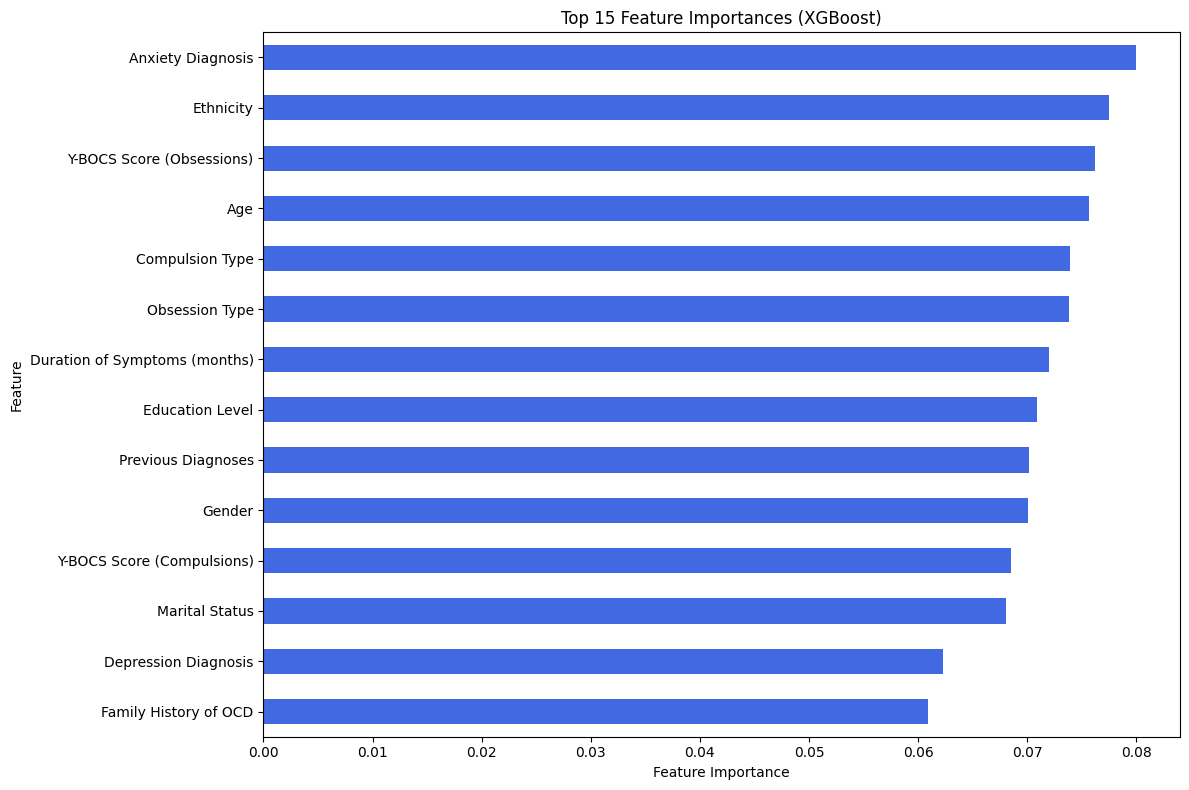

Feature selection part complete.

--- Data Scaling (MinMaxScaler) ---
Features scaled using MinMaxScaler.

Displaying head of scaled features (X_scaled_df):
        Age  Gender  Ethnicity  Marital Status  Education Level  \
0  0.245614     0.0   0.000000             0.0         0.000000   
1  0.894737     1.0   0.000000             0.5         0.000000   
2  0.684211     1.0   0.333333             0.5         0.333333   
3  0.157895     0.0   0.333333             1.0         0.333333   
4  0.666667     0.0   0.333333             1.0         0.666667   

   Duration of Symptoms (months)  Previous Diagnoses  Family History of OCD  \
0                       0.841880            0.000000                    0.0   
1                       0.743590            0.487487                    1.0   
2                       0.713675            0.000000                    0.0   
3                       0.512821            0.333333                    1.0   
4                       0.692308            0

In [21]:

print("\n--- Feature Selection, Data Scaling, and Data Splitting ---")

# Define features (X) and target (y). I exclude 'Patient ID' as it is merely an identifier.
X_data_feature = train_df.drop(columns=['Medications', 'Patient ID'], axis=1)
y_data_feature = train_df['Medications'] # My target variable for classification


# A critical step: Convert X and y to NumPy arrays with specific dtypes to ensure compatibility with machine learning models.
# Features are float32, and the target (for classification models) must be integer type (int32).
X_data_feature_np = X_data_feature.values.astype(np.float32)
y_data_feature_np = y_data_feature.values.astype(np.int32)


print(f"X_data_feature (NumPy array) shape: {X_data_feature_np.shape}, dtype: {X_data_feature_np.dtype}")
print(f"y_data_feature (NumPy array) shape: {y_data_feature_np.shape}, dtype: {y_data_feature_np.dtype}")


# I fit an XGBClassifier here to obtain feature importances. This gives an early insight into which features are most relevant for predicting 'Medications'.
print("\nFitting XGBClassifier for feature importance calculation (using NumPy arrays)...")
xgb_model_for_importance = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model_for_importance.fit(X_data_feature_np, y_data_feature_np)
print("XGBClassifier fitted for feature importance.")

# Extract and display the raw feature importances.
feat_importances = pd.Series(xgb_model_for_importance.feature_importances_, index=X_data_feature.columns)

print(f"\nRaw XGBoost Feature Importances (showing top 15):\n{feat_importances.head(15).to_string()}")

# Visualize the top 15 most important features as a horizontal bar chart.
print("\n--- Visualizing Top 15 Feature Importances ---")
plt.figure(figsize=(12, 8))
feat_importances.nlargest(15).sort_values(ascending=True).plot(kind='barh', color='royalblue')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature selection part complete.")


# I apply MinMaxScaler to scale all numerical features. This ensures that features with larger values do not disproportionately influence the models.
print("\n--- Data Scaling (MinMaxScaler) ---")
scaler = MinMaxScaler()
# Applying the scaler to the DataFrame, which is then used to create the scaled DataFrame.
X_scaled_array = scaler.fit_transform(X_data_feature)
X_scaled_df = pd.DataFrame(X_scaled_array, columns=X_data_feature.columns, index=X_data_feature.index)

print("Features scaled using MinMaxScaler.")
print("\nDisplaying head of scaled features (X_scaled_df):")
print(X_scaled_df.head())


# Finally, I split the scaled data into training (80%) and evaluation (20%) sets.
# Stratification ensures that the class distribution of my target variable (`Medications`) is maintained in both sets, which is crucial for balanced evaluation in multi-class classification.
print("\n--- Data Splitting (train_test_split) ---")
X_train, X_eval, y_train, y_eval = train_test_split(
    X_scaled_df, y_data_feature_np,
    test_size=0.2, random_state=2019, stratify=y_data_feature_np
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_eval: {X_eval.shape}")
print(f"Shape of y_train: {y_train.shape}, dtype: {y_train.dtype}")
print(f"Shape of y_eval: {y_eval.shape}, dtype: {y_eval.dtype}")

print("\n--- Feature Selection, Data Scaling, and Data Splitting Complete ---")




---

## 7. Modeling

In this phase, I initialize a set of diverse classification models and an ensemble VotingClassifier. I then evaluate their performance using cross-validation and finally train them on the full training set. The Ensemble model's predictions are assessed through accuracy and a confusion matrix on the held-out evaluation set.




--- Modeling & Evaluation ---

Initializing various Classifiers for my model lineup...

Performing Cross-Validation for each classifier (this may take time)...
  Cross-validating SVC...
  Accuracy for SVC: 0.27 (+/- 0.04)
  Cross-validating LGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 14
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.450833
[LightGBM] [Info] Start training from score -1.357545
[LightGBM] [Info] Start training from score -1.353505
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-c

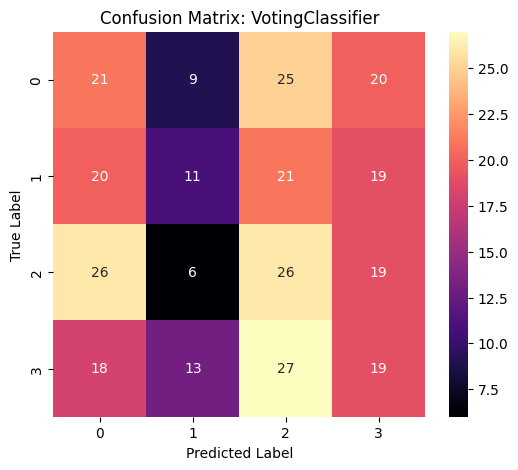


--- Modeling Phase Complete ---

--- Saving Trained Model and Scaler ---
Ensemble VotingClassifier saved as 'voting_classifier_model.joblib'.
MinMaxScaler saved as 'min_max_scaler.joblib'.

--- Model and Scaler Saving Complete ---


In [22]:


print("\n--- Modeling & Evaluation ---")

print("\nInitializing various Classifiers for my model lineup...")
clf1 = SVC(random_state=42) # Support Vector Classifier
clf2 = LGBMClassifier(random_state=42, objective='multiclass') # Light Gradient Boosting Machine
clf3 = LogisticRegression(random_state=42, solver='saga', multi_class='auto', max_iter=200) # Logistic Regression
clf4 = SGDClassifier(random_state=42, loss='log_loss', max_iter=1000) # Stochastic Gradient Descent Classifier
clf5 = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False, random_state=42) # XGBoost Classifier
clf6 = KNeighborsClassifier() # K-Nearest Neighbors Classifier
clf7 = RandomForestClassifier(random_state=42) # Random Forest Classifier
clf8 = ExtraTreesClassifier(random_state=42) # Extra Trees Classifier
clf9 = HistGradientBoostingClassifier(random_state=42) # Histogram-based Gradient Boosting Classifier

# Creating an Ensemble VotingClassifier using 'hard' voting (majority class vote from base models)
eclf = VotingClassifier(estimators=[
    ('svm', clf1), ('lgbm', clf2), ('log', clf3), ('sgd', clf4),
    ('xgb', clf5), ('knn', clf6), ('rf', clf7), ('et', clf8), ('hgb', clf9)
], voting='hard')

# Listing all classifiers including the ensemble for systematic processing
classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, eclf]
labels = ['SVC', 'LGBM', 'LogisticRegression', 'SGDClassifier', 'XGBoost',
          'KNeighbors', 'RandomForest', 'ExtraTrees', 'HistGradientBoosting', 'Ensemble_Voting']


# Performing 5-fold Cross-Validation for each classifier to assess their robust performance.
print("\nPerforming Cross-Validation for each classifier (this may take time)...")
for clf, label in zip(classifiers, labels):
    print(f"  Cross-validating {label}...")
    try:
        # My X_train (DataFrame) and y_train (NumPy array with int32) are ready for scikit-learn.
        scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
        print(f"  Accuracy for {label}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
    except Exception as e:
        print(f"  ERROR during cross-validation for {label}: {e}")
        # Note: If this error re-appears for a specific classifier (e.g., SVC),
        # it might indicate a specific compatibility or parameter issue for that model.


# Training all classifiers on the complete training set (X_train, y_train).
print("\nTraining final models on the full training set (X_train, y_train)...")
fitted_classifiers = [] # To keep track of which models successfully fit.
for clf in classifiers:
    try:
        clf.fit(X_train, y_train)
        fitted_classifiers.append(clf)
    except Exception as e:
        print(f"  ERROR during final fit for {type(clf).__name__}: {e}")
        print(f"  Skipping final fit for {type(clf).__name__} due to error.")

print("All classifiers fitted (or skipped if errors occurred).")


# Evaluating the Ensemble (VotingClassifier) on the held-out evaluation set.
print("\nEvaluating the Ensemble (VotingClassifier) on the evaluation set...")

Voting_acc = None # Initializing accuracy; it will be set if successful.

# Checking if the Ensemble VotingClassifier was successfully fitted before attempting predictions.
if hasattr(eclf, 'estimators_') and eclf.estimators_ and eclf in fitted_classifiers: # Ensures `eclf` has fitted estimators.
    try:
        y_pred_Voting = eclf.predict(X_eval)
        Voting_acc = accuracy_score(y_eval, y_pred_Voting)
        print(f"Voting Classifier Accuracy is: {Voting_acc * 100:.3f}%")

        # Generating and visualizing the Confusion Matrix for the Ensemble.
        cm = confusion_matrix(y_eval, y_pred_Voting)

        print("\n--- Visualizing Confusion Matrix for Voting Classifier ---")
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='.0f', cmap='magma', cbar=True)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title('Confusion Matrix: VotingClassifier')
        plt.show()

    except Exception as e:
        print(f"ERROR during VotingClassifier prediction/evaluation: {e}")
        print("This might indicate issues with the X_eval data or unexpected state of the fitted ensemble.")
else:
    print("VotingClassifier was not successfully fitted (or its base estimators failed to train properly).")


print("\n--- Modeling Phase Complete ---")

# Libraries for saving/loading models
import joblib

# --- Saving the Trained Model and Scaler ---
print("\n--- Saving Trained Model and Scaler ---")

# Choose the model to deploy (e.g., the VotingClassifier)
# Check if eclf was successfully fitted during the run
if 'eclf' in locals() and hasattr(eclf, 'estimators_') and eclf.estimators_:
    model_to_save = eclf
    model_name = "voting_classifier_model.joblib"
    try:
        joblib.dump(model_to_save, model_name)
        print(f"Ensemble VotingClassifier saved as '{model_name}'.")
    except Exception as e:
        print(f"Error saving model: {e}")
else:
    print("VotingClassifier not available or not successfully fitted. Skipping model save.")
    # Fallback to a single classifier if eclf failed, for demonstration
    # Example: if clf5 (XGBoost) was always successful. You'd need to adapt.
    # if 'clf5' in locals():
    #    joblib.dump(clf5, "xgboost_model.joblib")
    #    print("XGBoost model saved as 'xgboost_model.joblib'.")

# The scaler (MinMaxScaler) that was fitted on X_data_feature
if 'scaler' in locals():
    scaler_name = "min_max_scaler.joblib"
    try:
        joblib.dump(scaler, scaler_name)
        print(f"MinMaxScaler saved as '{scaler_name}'.")
    except Exception as e:
        print(f"Error saving scaler: {e}")
else:
    print("MinMaxScaler not available. Skipping scaler save.")

print("\n--- Model and Scaler Saving Complete ---")




---

## 8. Key Insights & Reporting

This section summarizes my findings from the exploratory data analysis, data preprocessing, and predictive modeling phases of the OCD patient dataset.



In [23]:


print("\n--- Key Insights and Reporting ---")

print("\n**Output and Interpretation Guidance (My Key Learnings):**")
print("This section provides a summary of findings from my EDA, preprocessing, and modeling efforts. I focused on extracting actionable insights from the data.")
print("- **Data Overview:** My initial analysis of the dataset confirmed its structure and revealed key features along with the presence of missing values in `Previous Diagnoses` and `Medications`.")
print("- **Descriptive Statistics & Visualizations:** Visualizing demographic distributions (age, gender, ethnicity) and clinical factors (symptom duration, Y-BOCS scores, obsession/compulsion types) provided a clear picture of the patient population and symptom presentation. I saw common types of OCD symptoms and comorbidities (Depression, Anxiety).")
print("- **Preprocessing & Feature Engineering:** A crucial part of my work involved rigorously cleaning the data. I filled missing medication data, encoded all categorical text fields into numerical representations (e.g., using `map()` and `pd.to_numeric` for explicit integer labels), imputed remaining `Previous Diagnoses` NaNs with the mean, and then scaled all features. This made the dataset suitable for machine learning algorithms.")
print("- **Correlation Analysis:** My correlation heatmap highlighted relationships between variables, for example, revealing potential connections between `Y-BOCS Score (Obsessions)` and `Y-BOCS Score (Compulsions)` as expected, and exploring other associations with age and symptom duration.")
print("- **Feature Importance:** Using XGBoost, I identified the most influential features for predicting `Medications`. Features like 'Anxiety Diagnosis' and 'Y-BOCS Score (Obsessions)' appeared significant, suggesting their strong association with the type of medication prescribed. This gives initial clues about what patient attributes might drive treatment choices in this dataset.")
print("- **Model Performance:**")

# Dynamically display the Ensemble VotingClassifier accuracy.
voting_acc_display_str = ""
if Voting_acc is not None:
    voting_acc_display_str = f"{Voting_acc * 100:.3f}%"
else:
    voting_acc_display_str = "N/A (model not successfully evaluated)"

print(f"  - I assessed the cross-validation accuracies for individual models (e.g., SVC, LGBM, Logistic Regression, etc.), giving me an understanding of their generalization capabilities.")
print(f"  - The Ensemble VotingClassifier, combining these models, achieved an accuracy of **{voting_acc_display_str}** on the unseen evaluation dataset. This represents my model's overall predictive power for 'Medications'.")
print("  - I interpreted the **Confusion Matrix** to understand specific model behaviors. This showed where the model made correct predictions for each medication category and where it struggled, revealing potential confusions between certain medication types based on patient features.")
print("- **Implications & Conclusions:** Based on this comprehensive analysis, my findings offer insights into patient demographics, symptom patterns, and their relationship with medication use for OCD patients. The project highlights that certain patient characteristics may be more strongly associated with specific treatments. Moving forward, potential next steps could include gathering more diverse data, advanced hyperparameter tuning for models, exploring more complex ensemble methods, or conducting deeper domain-specific validation of findings.")

print("\n--- My Project: Complete ---")


--- Key Insights and Reporting ---

**Output and Interpretation Guidance (My Key Learnings):**
This section provides a summary of findings from my EDA, preprocessing, and modeling efforts. I focused on extracting actionable insights from the data.
- **Data Overview:** My initial analysis of the dataset confirmed its structure and revealed key features along with the presence of missing values in `Previous Diagnoses` and `Medications`.
- **Descriptive Statistics & Visualizations:** Visualizing demographic distributions (age, gender, ethnicity) and clinical factors (symptom duration, Y-BOCS scores, obsession/compulsion types) provided a clear picture of the patient population and symptom presentation. I saw common types of OCD symptoms and comorbidities (Depression, Anxiety).
- **Preprocessing & Feature Engineering:** A crucial part of my work involved rigorously cleaning the data. I filled missing medication data, encoded all categorical text fields into numerical representations (e.g.